In [1]:
from typing import Annotated

from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages : Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
groq_api =os.getenv('groq_api_key')

In [5]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model
llm = init_chat_model("groq:llama-3.1-8b-instant")

In [6]:
graph_builder = ['a', 'dca', 'b','cada']

In [7]:
def chatbot(state:State):
    return {'messages': llm.invoke(state['messages']) }

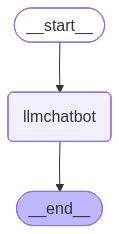

In [8]:
graph_builder = StateGraph(State)

# adding nodes
graph_builder.add_node("llmchatbot", chatbot)

#add edges
graph_builder.add_edge(START, 'llmchatbot')
graph_builder.add_edge('llmchatbot',END)

graph= graph_builder.compile()
graph

In [9]:
for event in graph.stream({'messages':'hi, how are you'}):
    for value in event.values():
        print(value['messages'])


content="I'm just a computer program, so I don't have feelings, but thank you for asking. How can I assist you today?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 40, 'total_tokens': 68, 'completion_time': 0.028010635, 'completion_tokens_details': None, 'prompt_time': 0.002532615, 'prompt_tokens_details': None, 'queue_time': 0.087138297, 'total_time': 0.03054325}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019c8569-fb20-7323-ba83-3eaa00ad454e-0' tool_calls=[] invalid_tool_calls=[] usage_metadata={'input_tokens': 40, 'output_tokens': 28, 'total_tokens': 68}


## chatboot with tool

In [10]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results=2)
response =tool.invoke('what is AI')
response

{'query': 'what is AI',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://aws.amazon.com/what-is/artificial-intelligence/',
   'title': 'What is AI? - Artificial Intelligence Explained',
   'content': 'Artificial Intelligence (AI) is a transformative technology that enables machines to perform human-like problem-solving tasks. Unlike past AI, which was limited to analyzing data, generative AI leverages deep learning and massive datasets to produce high-quality, human-like creative outputs. To start using AI in your business, identify areas where AI can improve efficiency, such as automating customer service with chatbots, analyzing data for better decision-making, or personalizing marketing efforts. With the most comprehensive set of AI services, tools, and resources, AWS brings deep expertise to over 100,000 customers to meet the demands of their business and unlock the value of their data. With the most comprehensive set of AI services, tools

In [11]:
def multiply(a:int, b:int)->int:
    """Multiply a and b
    
    Args: 
    a (int): first int
    b (int): second int

    Retruns:
    int: output int

    """

    return a*b

In [12]:
tools = [tool, multiply]
tools

[TavilySearch(max_results=2, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'), api_base_url=None)),
 <function __main__.multiply(a: int, b: int) -> int>]

In [13]:
llm_with_tools = llm.bind_tools(tools)
llm_with_tools

RunnableBinding(bound=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000001F2DE243A10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001F2DE404830>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input sho

In [14]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# node definition
def toolcall(state:State):
    return {'messages': [llm_with_tools.invoke(state['messages'])]}

graph_binder = StateGraph(State)


#add nodes
graph_binder.add_node('llm_tool_calling', toolcall)
graph_binder.add_node('tools', ToolNode(tools))

#add edge
graph_binder.add_edge (START, 'llm_tool_calling')
graph_binder.add_conditional_edges('llm_tool_calling', tools_condition)
graph_binder.add_edge('tools', END)

graph2 = graph_binder.compile()

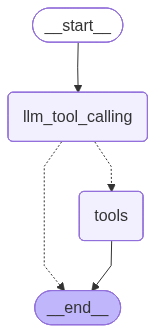

In [15]:
graph2

In [16]:
response = graph2.invoke({'messages': 'hi_what is the recent AI news'})

In [17]:
response['messages'][-1].content

'{"query": "AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.digitaljournal.com/business/ai-agent-invasion-has-people-trying-to-pick-winners/article", "title": "AI agent invasion has people trying to pick winners - Digital Journal", "score": 0.62358373, "published_date": "Sun, 22 Feb 2026 04:52:00 GMT", "content": "“Suddenly, entirely new businesses that had no economic attractiveness without the internet started to exist, like Netflix,” Schloetzer said.\\n\\n“I’m waiting to see these new companies or industries that are created (by AI).”\\n\\nAI angst is spreading way beyond the tech industry.\\n\\nA recent blog post by US entrepreneur Matt Shumer titled “Something Big Is Happening” includes a prediction that AI will be tackling jobs in law, finance, accounting, consulting, medicine and other fields.\\n\\nThe experience that tech workers had of seeing AI go from a “helpful tool” to something that “does my job better than I do” will 

In [18]:
for i in response['messages']:
    i.pretty_print()

================================ Human Message =================================

hi_what is the recent AI news
================================== Ai Message ==================================
Tool Calls:
  tavily_search (kzrvajqy3)
 Call ID: kzrvajqy3
  Args:
    query: AI news
    search_depth: advanced
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.digitaljournal.com/business/ai-agent-invasion-has-people-trying-to-pick-winners/article", "title": "AI agent invasion has people trying to pick winners - Digital Journal", "score": 0.62358373, "published_date": "Sun, 22 Feb 2026 04:52:00 GMT", "content": "“Suddenly, entirely new businesses that had no economic attractiveness without the internet started to exist, like Netflix,” Schloetzer said.\n\n“I’m waiting to see these new companies o

In [19]:
response = graph2.invoke({'messages': 'tell me what is the recent AI news and what is 2 multiplied by 3'})

In [20]:
for i in response['messages']:
    i.pretty_print()

================================ Human Message =================================

tell me what is the recent AI news and what is 2 multiplied by 3
================================== Ai Message ==================================
Tool Calls:
  tavily_search (x0tgjyfj2)
 Call ID: x0tgjyfj2
  Args:
    query: recent AI news
    topic: news
  multiply (08h74hdb8)
 Call ID: 08h74hdb8
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: tavily_search

{"query": "recent AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.businessinsider.com/openclaw-ai-demand-token-use-surge-nvidia-pricing-jumps-2026-2", "title": "There's been a surge in AI use recently. Here's what's behind it. - Business Insider", "score": 0.8201387, "published_date": "Thu, 19 Feb 2026 10:00:04 GMT", "content": "# There's been a surge in AI use recently. * AI token usage soared in recent weeks, while Nvidia GPU prici

### React Agent

In [21]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# node definition
def toolcall(state:State):
    return {'messages': [llm_with_tools.invoke(state['messages'])]}

graph_binder = StateGraph(State)


#add nodes
graph_binder.add_node('llm_tool_calling', toolcall)
graph_binder.add_node('tools', ToolNode(tools))

#add edge
graph_binder.add_edge (START, 'llm_tool_calling')
graph_binder.add_conditional_edges('llm_tool_calling', tools_condition)
graph_binder.add_edge('tools', 'llm_tool_calling')

graph_react = graph_binder.compile()

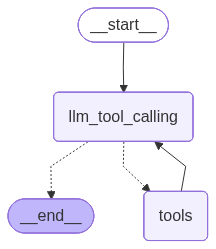

In [22]:
graph_react

In [23]:
response = graph_react.invoke({'messages': 'tell me what is the recent AI news and what is 2 multiplied by 3'})

In [24]:
for i in response['messages']:
    i.pretty_print()

================================ Human Message =================================

tell me what is the recent AI news and what is 2 multiplied by 3
================================== Ai Message ==================================
Tool Calls:
  tavily_search (729x57f3c)
 Call ID: 729x57f3c
  Args:
    query: recent AI news
    start_date: 2024-01-01
    time_range: day
    topic: general
  multiply (ztmrct2d7)
 Call ID: ztmrct2d7
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: tavily_search

{'error': ValueError('Error 400: When time_range is set, start_date or end_date cannot be set')}
================================= Tool Message =================================
Name: multiply

6
================================== Ai Message ==================================

The function 'tavily_search' failed because 'time_range', 'start_date', and 'end_date' cannot be used together.


# Adding Memmory to Agentic Graph

In [25]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memmory_saver = MemorySaver()

# node definition
def toolcall(state:State):
    return {'messages': [llm_with_tools.invoke(state['messages'])]}

graph_binder = StateGraph(State)


#add nodes
graph_binder.add_node('llm_tool_calling', toolcall)
graph_binder.add_node('tools', ToolNode(tools))

#add edge
graph_binder.add_edge (START, 'llm_tool_calling')
graph_binder.add_conditional_edges('llm_tool_calling', tools_condition)
graph_binder.add_edge('tools', 'llm_tool_calling')

graph_memmory = graph_binder.compile(checkpointer=memmory_saver)

In [26]:
config = {"configurable": {"thread_id": "1"}}
config2 = {"configurable": {"thread_id": "2"}}

In [27]:
resp = graph_memmory.invoke(input= {'messages': 'HI my name is Nagaraj'}, config=config)
for i in resp['messages']:
    i.pretty_print()

================================ Human Message =================================

HI my name is Nagaraj
================================== Ai Message ==================================

Nice to meet you Nagaraj. Is there something I can help you with today?


In [28]:
resp = graph_memmory.invoke(input= {'messages': 'what was the last question i asked'}, config=config2)
for i in resp['messages']:
    i.pretty_print()

================================ Human Message =================================

what was the last question i asked
================================== Ai Message ==================================

You didn't ask a question prior to this. This is the start of our conversation.


### streaming

Streaming
Methods: .stream() and astream()

These methods are sync and async methods for streaming back results.
Additional parameters in streaming modes for graph state

values : This streams the full state of the graph after each node is called.\
updates : This streams updates to the state of the graph after each node is called

In [29]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

In [30]:
def superbot(state:State):
    return {'messages': [llm.invoke(state['messages'])]}

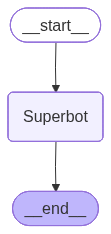

In [31]:
graph_builder = StateGraph(State)

#add nodes
graph_builder.add_node('Superbot', superbot)

# add edges
graph_builder.add_edge(START, 'Superbot')
graph_builder.add_edge('Superbot', END)

graph =graph_builder.compile(checkpointer= memory)
graph

In [32]:
config = {'configurable': {'thread_id': '5'}}

# for chunk in graph.stream(input={'messages': 'hi, my name is john, i like to watch movies'}, config= config, stream_mode= 'updates'):
#     print(chunk)

In [33]:
for chunk in graph.stream(input={'messages': 'hi, my name is john, i like to watch movies'}, config= config, stream_mode= 'values'):
    print(chunk)

{'messages': [HumanMessage(content='hi, my name is john, i like to watch movies', additional_kwargs={}, response_metadata={}, id='6a46acc0-4e3a-4223-b965-80914fedb0a7')]}
{'messages': [HumanMessage(content='hi, my name is john, i like to watch movies', additional_kwargs={}, response_metadata={}, id='6a46acc0-4e3a-4223-b965-80914fedb0a7'), AIMessage(content="Hi John, nice to meet you. It's great that you enjoy watching movies. What kind of movies do you like to watch? Are you more into action, rom-coms, horror, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 47, 'total_tokens': 91, 'completion_time': 0.053012127, 'completion_tokens_details': None, 'prompt_time': 0.002667987, 'prompt_tokens_details': None, 'queue_time': 0.087366537, 'total_time': 0.055680114}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_pro

In [34]:
for chunk in graph.stream(input={'messages': 'i also like to watch web series'}, config= config, stream_mode= 'values'):
    print(chunk)

{'messages': [HumanMessage(content='hi, my name is john, i like to watch movies', additional_kwargs={}, response_metadata={}, id='6a46acc0-4e3a-4223-b965-80914fedb0a7'), AIMessage(content="Hi John, nice to meet you. It's great that you enjoy watching movies. What kind of movies do you like to watch? Are you more into action, rom-coms, horror, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 47, 'total_tokens': 91, 'completion_time': 0.053012127, 'completion_tokens_details': None, 'prompt_time': 0.002667987, 'prompt_tokens_details': None, 'queue_time': 0.087366537, 'total_time': 0.055680114}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c856a-c4c7-7120-8b2d-a0c7684446e0-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 47, 'output_tokens': 44, 'total

{'messages': [HumanMessage(content='hi, my name is john, i like to watch movies', additional_kwargs={}, response_metadata={}, id='6a46acc0-4e3a-4223-b965-80914fedb0a7'), AIMessage(content="Hi John, nice to meet you. It's great that you enjoy watching movies. What kind of movies do you like to watch? Are you more into action, rom-coms, horror, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 47, 'total_tokens': 91, 'completion_time': 0.053012127, 'completion_tokens_details': None, 'prompt_time': 0.002667987, 'prompt_tokens_details': None, 'queue_time': 0.087366537, 'total_time': 0.055680114}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c856a-c4c7-7120-8b2d-a0c7684446e0-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 47, 'output_tokens': 44, 'total

In [35]:
for chunk in graph.stream(input={'messages': 'suggest some web series'}, config= config, stream_mode= 'values'):
    print(chunk)

{'messages': [HumanMessage(content='hi, my name is john, i like to watch movies', additional_kwargs={}, response_metadata={}, id='6a46acc0-4e3a-4223-b965-80914fedb0a7'), AIMessage(content="Hi John, nice to meet you. It's great that you enjoy watching movies. What kind of movies do you like to watch? Are you more into action, rom-coms, horror, or something else?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 47, 'total_tokens': 91, 'completion_time': 0.053012127, 'completion_tokens_details': None, 'prompt_time': 0.002667987, 'prompt_tokens_details': None, 'queue_time': 0.087366537, 'total_time': 0.055680114}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c856a-c4c7-7120-8b2d-a0c7684446e0-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 47, 'output_tokens': 44, 'total